In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVC
from catboost import CatBoostRegressor, Pool
from ngboost import NGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

from sklearn.datasets import load_boston


ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
train = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/comp/housing/dataset/train.csv")
test  = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/comp/housing/dataset/test.csv")

FileNotFoundError: ignored

# 수치화

In [ ]:
train.replace(['Ex'],5,inplace=True)
train.replace(['Gd'],4,inplace=True)
train.replace(['TA'],3,inplace=True)
train.replace(['Fa'],2,inplace=True)
train.replace(['Po'],1,inplace=True)
train=train.drop('id',axis=1)

# 상관관계 분석

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

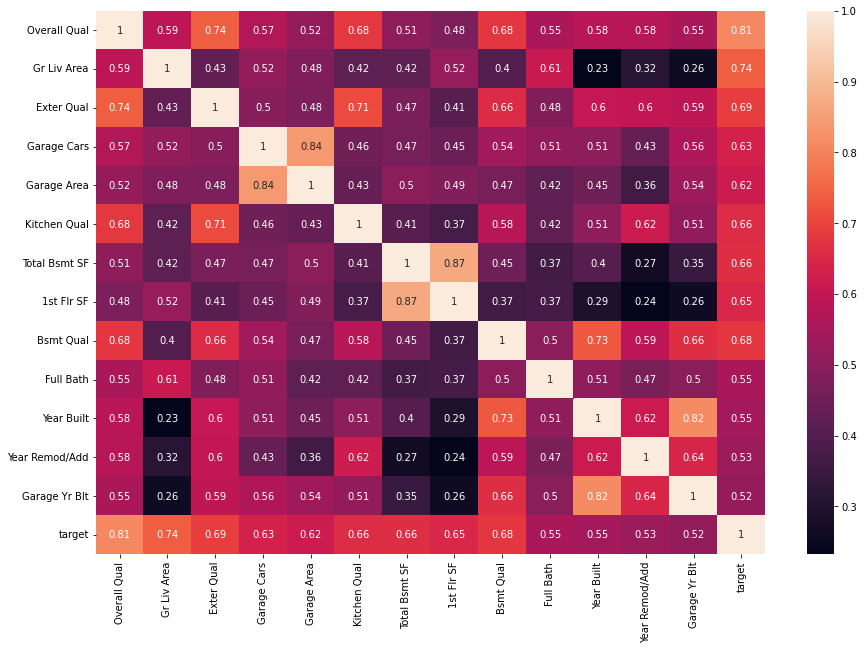

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True)

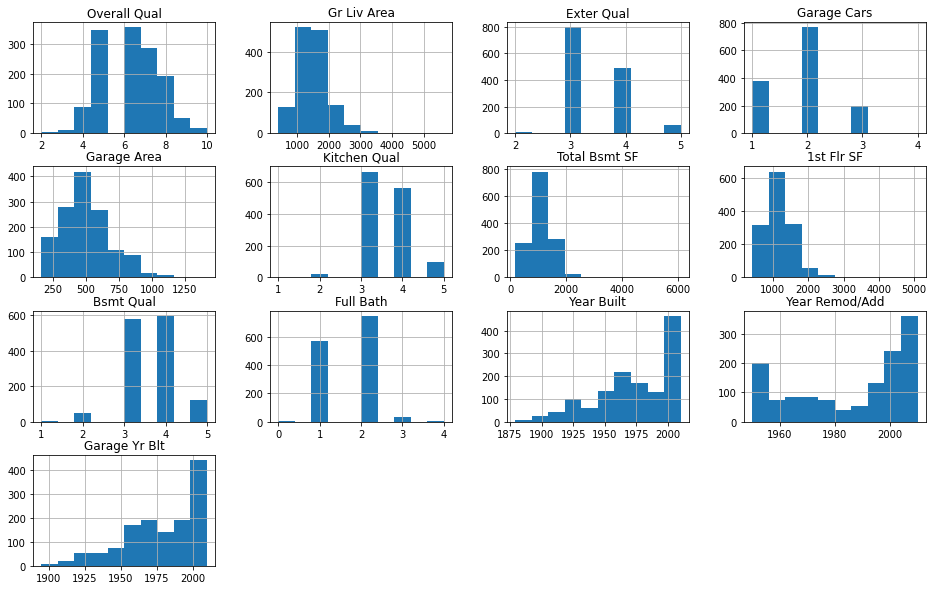

In [ ]:
testfortest.hist(figsize=(16,10))
plt.show()

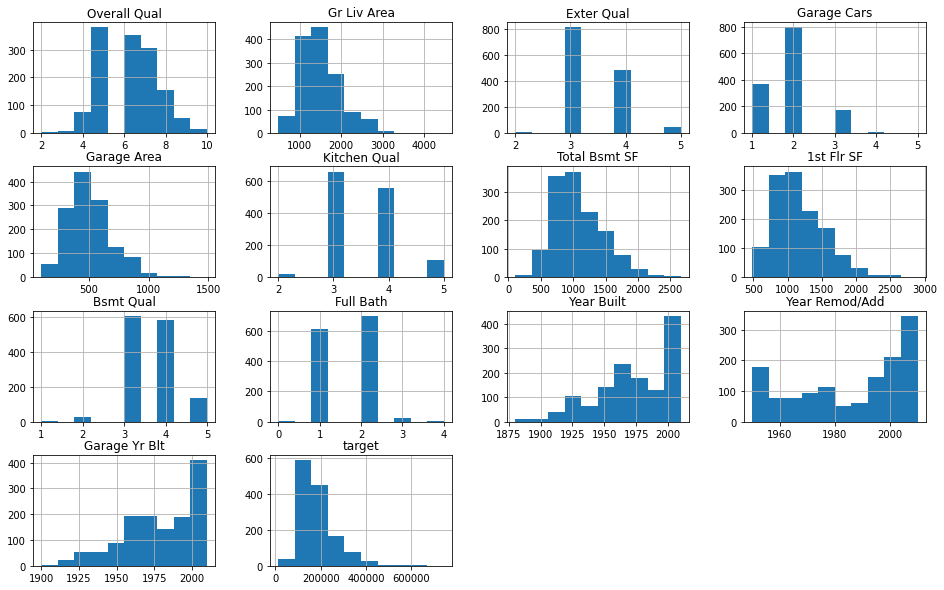

In [ ]:
train.hist(figsize=(16,10))
plt.show()

# 이상치 제거

In [ ]:
sns.scatterplot(data=train, x="Year Built", y="Garage Yr Blt")

NameError: ignored

Garaage Yr Blt 컬럼에 이상치 확은 (2200년이 넘는 데이터)->삭제

In [ ]:
drop_idx = train[train['Garage Yr Blt'] >= 2200].index.tolist()
train = train.drop(drop_idx, axis=0)

<AxesSubplot:xlabel='Year Built', ylabel='Garage Yr Blt'>

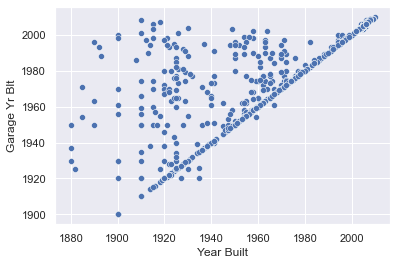

In [ ]:
sns.scatterplot(data=train, x="Year Built", y="Garage Yr Blt")

# 중복데이터 처리

target만 다르고 나머지 정보가 똑같은 데이터 존재 -> 처리<br>
지하실/차고 존재, 가격=달러 ->미국 주택가격으로 예상됨<br>
데이터의 년도가 2010년 이후로 존재하지 않음 -> 2010년 이후에 가격이 측정된 것으로 예상됨<br>
미국 주택 가격지수 추이를 봤을 때 2010년 이후 주택 가격이 지속적으로 오르고 있음 ->target이 높은 데이터가 최근 데이터라고 추정<br>
target이 낮은 중복 데이터 삭제<br>

혹은 id가 데이터 수집순으로 정렬되어있다고 가정할때, 가장 마지막 데이터가 최근데이터일 수 도 있음-> 고려<br>
혹은 중복데이터 target들의 평균값으로 새로운 인덱스 구성 -> 고려

<img src="https://mblogthumb-phinf.pstatic.net/MjAxNzEyMjFfNzkg/MDAxNTEzODI5ODU2MDEw.HaD-1LtnNgbnhC2apIorW2stO3lvKL9YQAtsaxsD6mMg._Ift5BSRHPLmpGQlpWlIobOdad838X9mDI82T8vPNwUg.JPEG.hichungg/6.jpg?type=w800"></br>

In [ ]:
#중복 데이터
train[train.duplicated(['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt'])]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
108,4,1092,3,1,253,3,546,546,3,1,1972,1972,1972,85500
244,7,1374,4,2,400,4,384,744,4,2,2004,2004,2004,167000
352,8,1646,4,2,525,4,1594,1646,5,2,2004,2005,2004,300000
457,5,1728,3,2,576,3,1728,1728,3,2,1965,1965,1987,142600
619,8,1324,4,2,550,4,1324,1324,4,2,2006,2006,2006,221370
675,6,1224,4,2,528,4,612,612,4,2,2009,2009,2009,173733
734,7,1368,4,2,474,4,1368,1368,4,2,2005,2006,2005,202500
768,6,848,4,2,420,4,848,848,4,1,2003,2003,2003,131500
795,6,848,4,2,420,4,848,848,4,1,2004,2004,2004,144500
819,7,1492,4,2,440,4,738,738,4,2,2006,2006,2006,185101


1) target을 내림차순으로 정렬 후 첫번째만 남기고 삭제하기 -> 가격이 높은 것만 남기기

In [ ]:
#train=train.sort_values(by=['target'], ascending=False)
#train=train.drop_duplicates(['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt'], keep = 'first')

2) 중복데이터 중 가장 마지막 데이터만 남기기->id상으로 최근 데이터일 수 있기 때문

In [ ]:
train=train.drop_duplicates(['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt'], keep =  False)

In [ ]:
train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,5,3,968,5,2392,2392,5,2,2003,2003,2003,386250
1,7,1352,4,2,466,4,1352,1352,5,2,2006,2007,2006,194000
2,5,900,3,1,288,3,864,900,3,1,1967,1967,1967,123000
3,5,1174,3,2,576,4,680,680,3,1,1900,2006,2000,135000
4,7,1958,4,3,936,4,1026,1026,4,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,4,2,422,3,872,888,5,2,1996,1997,1996,204000
1346,9,2748,4,3,850,5,1850,1850,5,2,2006,2006,2006,390000
1347,5,1214,3,1,318,3,1214,1214,3,2,1967,1967,1967,143000
1348,5,894,3,2,440,3,864,894,4,1,1974,1974,1974,131000


In [ ]:
#제거됐는지 확인
train[train.duplicated(['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt'])]

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target


In [ ]:
#인덱스 재정렬
train=train.sort_index()
train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,5,3,968,5,2392,2392,5,2,2003,2003,2003,386250
1,7,1352,4,2,466,4,1352,1352,5,2,2006,2007,2006,194000
2,5,900,3,1,288,3,864,900,3,1,1967,1967,1967,123000
3,5,1174,3,2,576,4,680,680,3,1,1900,2006,2000,135000
4,7,1958,4,3,936,4,1026,1026,4,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,4,2,422,3,872,888,5,2,1996,1997,1996,204000
1346,9,2748,4,3,850,5,1850,1850,5,2,2006,2006,2006,390000
1347,5,1214,3,1,318,3,1214,1214,3,2,1967,1967,1967,143000
1348,5,894,3,2,440,3,864,894,4,1,1974,1974,1974,131000


In [ ]:
#커스텀 스코어링
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

In [ ]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [ ]:
def my_fit_score(df):
    y = df["target"]
    X = df.drop(["target"], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
    model_list = [LinearRegression(),Lasso(),ElasticNet(),Ridge(),
                  XGBRegressor(colsample_bytree= 1.0, max_depth= 3, min_child_weight= 1.0, n_estimators= 100),
                  LGBMRegressor(colsample_bytree= 0.8, learning_rate= 0.05, max_depth= 8, n_estimators= 100, subsample= 0.8),
                  RandomForestRegressor(random_state=42,min_samples_leaf= 1, min_samples_split= 6,criterion = 'mae'),
                  CatBoostRegressor(depth = 4, random_state = 42, loss_function = 'MAE', n_estimators = 3000, learning_rate = 0.03, verbose = 0),
                  GradientBoostingRegressor(random_state = 42, max_depth = 4, learning_rate = 0.01, n_estimators = 1000),
                  NGBRegressor(random_state = 42, n_estimators = 1000, verbose = 0, learning_rate = 0.03),]
    for model in model_list:
        global preddf
        nmaescore=cross_val_score(model,X_train,y_train,scoring=make_scorer(NMAE,greater_is_better=False),cv=5)
        print(model.__class__.__name__,':',np.mean(nmaescore),)
        model.fit(X_train, y_train)
        preddf[model.__class__.__name__] = model.predict(testfortest)

In [ ]:
my_fit_score(train) #중복데이터중 가격이 큰것만 남겼을 때

LinearRegression : -0.11618387453629073
Lasso : -0.11618174795951133
ElasticNet : -0.11767257977787444
Ridge : -0.1161494767449027
XGBRegressor : -0.1054103927091465
LGBMRegressor : -0.10037897642090463
RandomForestRegressor : -0.10098745031001569
CatBoostRegressor : -0.09717967707954
GradientBoostingRegressor : -0.10093004952640347
NGBRegressor : -0.10250626217443548


In [ ]:
my_fit_score(train) #중복데이터중 id가 높은 것만 남겼을 때

LinearRegression : -0.11560320073332049
Lasso : -0.11560078399666071
ElasticNet : -0.11662458455631972
Ridge : -0.11556816490207326
XGBRegressor : -0.1063656043235695
LGBMRegressor : -0.09770761244337718
RandomForestRegressor : -0.10093323912297666
CatBoostRegressor : -0.09645005273552182
GradientBoostingRegressor : -0.0980301274263502
NGBRegressor : -0.10015943441045165


# 테스트용 데이터 만들기

In [ ]:
testfortest=test.copy()
testfortest

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,2,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,3,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,4,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,8,1932,Ex,3,774,Ex,1932,1932,Ex,2,2008,2008,2008
1346,1347,5,912,TA,1,288,TA,912,912,TA,1,1964,1964,1964
1347,1348,4,861,TA,2,288,TA,861,861,Fa,1,1920,1950,1920
1348,1349,5,1430,TA,2,624,Gd,1430,1430,Ex,2,2004,2005,2004


In [ ]:
testfortest.replace(['Ex'],5,inplace=True)
testfortest.replace(['Gd'],4,inplace=True)
testfortest.replace(['TA'],3,inplace=True)
testfortest.replace(['Fa'],2,inplace=True)
testfortest.replace(['Po'],1,inplace=True)
testfortest=testfortest.drop('id',axis=1)
testfortest

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,9,1800,4,2,702,5,1800,1800,5,2,2007,2007,2007
1,6,1082,3,1,240,3,1082,1082,3,1,1948,1950,1948
2,6,1573,4,2,440,4,756,769,4,2,2000,2000,2000
3,6,2443,4,3,744,4,1158,1158,4,2,2004,2004,2004
4,5,1040,3,2,686,3,1040,1040,3,1,1968,1968,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,8,1932,5,3,774,5,1932,1932,5,2,2008,2008,2008
1346,5,912,3,1,288,3,912,912,3,1,1964,1964,1964
1347,4,861,3,2,288,3,861,861,2,1,1920,1950,1920
1348,5,1430,3,2,624,4,1430,1430,5,2,2004,2005,2004


In [ ]:
preddf=pd.DataFrame(data=test['id'],columns=['id'])
preddf

,id
0,1
1,2
2,3
3,4
4,5
...,...
1345,1346
1346,1347
1347,1348
1348,1349


In [ ]:
preddf.head()

,id
0,1
1,2
2,3
3,4
4,5


In [ ]:
preddf['target']=(preddf['GradientBoostingRegressor']+preddf['LGBMRegressor']+preddf['NGBRegressor']+preddf['CatBoostRegressor'])/4

In [ ]:
df2=preddf[['id','target']]

In [ ]:
df2

,id,target
0,1,337760.380672
1,2,129696.496393
2,3,176136.923169
3,4,243813.588909
4,5,133977.089815
...,...,...
1345,1346,332636.405248
1346,1347,123918.466215
1347,1348,78190.306418
1348,1349,199995.570084


In [ ]:
df2.to_csv("sub_duplicated.csv",index=False)

# 스태킹

In [ ]:
y = train["target"]
X = train.drop(["target"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n,y_train_n,X_test_n,n_folds):
    kf=KFold(n_splits=n_folds, shuffle=True, random_state=1234)
    train_fold_pred=np.zeros((X_train_n.shape[0],1))
    test_pred=np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__,'model 시작')
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ', folder_counter, '시작')
        X_tr=X_train_n[train_index]
        y_tr=y_train_n[train_index]
        X_te=X_train_n[valid_index]
        model.fit(X_tr,y_tr)
        train_fold_pred[valid_index,:]=model.predict(X_te).reshape(-1,1)
        test_pred[:,folder_counter]=model.predict(X_test_n)
    test_pred_mean=np.mean(test_pred,axis=1).reshape(-1,1)
    return train_fold_pred, test_pred_mean


In [ ]:
lgb=LGBMRegressor(colsample_bytree= 0.8, learning_rate= 0.05, max_depth= 8, n_estimators= 100, subsample= 0.8)
cbr=CatBoostRegressor(depth = 4, random_state = 42, loss_function = 'MAE', n_estimators = 3000, learning_rate = 0.03, verbose = 0)
gbr=GradientBoostingRegressor(random_state = 42, max_depth = 4, learning_rate = 0.01, n_estimators = 1000)
ngb=NGBRegressor(random_state = 42, n_estimators = 1000, verbose = 0, learning_rate = 0.03)

In [ ]:
lasso_reg = Lasso(alpha=0.001)
ridge_reg = Ridge(alpha=8)
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

In [ ]:
# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
       
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
   
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = testfortest.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
submission = pd.DataFrame({"id" :test['id'],"target": final})
submission.to_csv('stacking_final_lasso_dup.csv', index=False)

In [ ]:
#점수확인용
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n=y_train.values

lgb_train,lgb_test=get_stacking_base_datasets(lgb,X_train_n,y_train_n,X_test_n,5)
cbr_train,cbr_test=get_stacking_base_datasets(cbr,X_train_n,y_train_n,X_test_n,5)
gbr_train,gbr_test=get_stacking_base_datasets(gbr,X_train_n,y_train_n,X_test_n,5)
ngb_train,ngb_test=get_stacking_base_datasets(ngb,X_train_n,y_train_n,X_test_n,5)

LGBMRegressor model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
CatBoostRegressor model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
GradientBoostingRegressor model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
NGBRegressor model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작


In [ ]:
#제출용
X_train_n = X_train.values
X_test_n = testfortest.values
y_train_n=y_train.values

lgb_train,lgb_test=get_stacking_base_datasets(lgb,X_train_n,y_train_n,X_test_n,5)
cbr_train,cbr_test=get_stacking_base_datasets(cbr,X_train_n,y_train_n,X_test_n,5)
gbr_train,gbr_test=get_stacking_base_datasets(gbr,X_train_n,y_train_n,X_test_n,5)
ngb_train,ngb_test=get_stacking_base_datasets(ngb,X_train_n,y_train_n,X_test_n,5)

LGBMRegressor model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
CatBoostRegressor model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
GradientBoostingRegressor model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
NGBRegressor model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작


In [ ]:
##점수확인용

Stack_final_X_train=np.concatenate((lgb_train,cbr_train,ngb_train),axis=1)
Stack_final_X_test=np.concatenate((lgb_test,cbr_test,ngb_test),axis=1)

meta_model_ngb=CatBoostRegressor(depth = 4, random_state = 42, loss_function = 'MAE', n_estimators = 3000, learning_rate = 0.03, verbose = 0)

meta_model_ngb.fit(Stack_final_X_train,y_train)
final=meta_model_ngb.predict(Stack_final_X_test)
nmae=NMAE(y_test, final)
print('nmae :',nmae)

nmae : 0.10336204341253524


In [ ]:
##점수확인용

Stack_final_X_train=np.concatenate((lgb_train,cbr_train,gbr_train,ngb_train),axis=1)
Stack_final_X_test=np.concatenate((lgb_test,cbr_test,gbr_test,ngb_test),axis=1)

meta_model_ngb=XGBRegressor(colsample_bytree= 1.0, max_depth= 3, min_child_weight= 1.0, n_estimators= 100)

meta_model_ngb.fit(Stack_final_X_train,y_train)
final=meta_model_ngb.predict(Stack_final_X_test)
nmae=NMAE(y_test, final)
print('nmae :',nmae)

nmae : 0.10633667765337164


In [ ]:
## 제출용

Stack_final_X_train=np.concatenate((lgb_train,cbr_train,gbr_train,ngb_train),axis=1)
Stack_final_X_test=np.concatenate((lgb_test,cbr_test,gbr_test,ngb_test),axis=1)

meta_model_ngb=XGBRegressor(colsample_bytree= 1.0, max_depth= 3, min_child_weight= 1.0, n_estimators= 100)

meta_model_ngb.fit(Stack_final_X_train,y_train)
final=meta_model_ngb.predict(Stack_final_X_test)
submission = pd.DataFrame({"id" :test['id'],"target": final})
submission.to_csv('stacking_final_xgb_dup.csv', index=False)


# 혼합 모델

In [ ]:
def get_nmae_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        nmae = NMAE(y_test , pred_value)
        print('{0} 모델의 nmae: {1}'.format(key, nmae))

# 개별 모델의 학습

lgb=LGBMRegressor(colsample_bytree= 0.8, learning_rate= 0.05, max_depth= 8, n_estimators= 100, subsample= 0.8)
lgb.fit(X_train, y_train)
cbr=CatBoostRegressor(depth = 4, random_state = 42, loss_function = 'MAE', n_estimators = 3000, learning_rate = 0.03, verbose = 0)
cbr.fit(X_train, y_train)
gbr= RandomForestRegressor(random_state=42,min_samples_leaf= 1, min_samples_split= 6,criterion = 'mae')
gbr.fit(X_train, y_train)
ngb=NGBRegressor(random_state = 42, n_estimators = 1000, verbose = 0, learning_rate = 0.03)
ngb.fit(X_train, y_train)

# 개별 모델 예측
lgb_pred = lgb.predict(X_test)
cbr_pred = cbr.predict(X_test)
gbr_pred = gbr.predict(X_test)
ngb_pred = ngb.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.00* lgb_pred + 1.00 * cbr_pred + 0.0 * gbr_pred + 0.0 * ngb_pred
preds = {'최종 혼합': pred,
         'lgb': lgb_pred,
         'cbr': cbr_pred,
         'gbr': gbr_pred,
         'ngb': ngb_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_nmae_pred(preds)

최종 혼합 모델의 nmae: 0.08928281168363045
lgb 모델의 nmae: 0.08963563330204893
cbr 모델의 nmae: 0.08928281168363045
gbr 모델의 nmae: 0.09385971873050973
ngb 모델의 nmae: 0.09283676047693486


In [ ]:
0.08648568815545644
0.0864763789916513

In [ ]:
lasso_reg = Lasso(alpha=0.001)
ridge_reg = Ridge(alpha=8)